<a href="https://colab.research.google.com/github/Rudh1830/-Rudh1830-Diabetes-Prediction-Using-Decision-Tree/blob/main/Diabetes_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NUMPY - to work with number related data
pandas -  to work with all data
data handle eda
columns are feautres row are record sample observation

In [ ]:
import pandas as pd
df1 = pd.read_csv("i1.csv")
df2 = pd.read_csv("i2.csv")


In [ ]:
#merge data
data = df1.merge(df2,how = 'outer')  # it merges all rows and columns even if it is not same
'''merged_df = pd.concat([df1, df2], ignore_index=True)
print(merged_df)'''


'merged_df = pd.concat([df1, df2], ignore_index=True)\nprint(merged_df)'

In [ ]:
#eda info ,describe,shape,null,data viz
s = data.shape
siz = data.size
print(siz)
print(s)

249936
(15621, 16)


In [ ]:
inf = data.info
print(inf)
des = data.describe
print(des)
null = data.isnull().sum()
print(null)


<bound method DataFrame.info of              Date            Timestamp  Invoice No.  \
0      2023-04-01  2023-04-01 13:16:03        23465   
1      2023-04-01  2023-04-01 13:16:03        23465   
2      2023-04-01  2023-04-01 13:16:03        23465   
3      2023-04-01  2023-04-01 13:16:03        23465   
4      2023-04-01  2023-04-01 13:16:03        23465   
...           ...                  ...          ...   
15616  2023-09-19  2023-09-19 22:03:44        28389   
15617  2023-09-19  2023-09-19 22:03:44        28389   
15618  2023-09-19  2023-09-19 22:03:44        28389   
15619  2023-09-19  2023-09-19 22:03:44        28389   
15620  2023-09-19  2023-09-19 22:03:44        28389   

                         Item Name  Price  Qty.  Sub Total  Discount    Tax  \
0              Babycorn Manchurian  160.0   1.0      160.0       0.0   8.00   
1                Chicken Kati Roll  120.0   1.0      120.0       0.0   6.00   
2             Paneer Butter Masala  150.0   2.0      300.0       0.0  

In [ ]:
data["Invoice No."].unique()


array([23465, 23466, 23467, ..., 28387, 28388, 28389])

In [ ]:
data["Invoice No."].nunique()


4925

In [ ]:
data['Final Total'].sum()

np.float64(2397010.12)

In [ ]:
#avg -  total sum/ no of bill(invoice)
avg = ((data['Final Total'].sum())/(data['Invoice No.'].nunique()))
print(avg)

486.70256243654825


In [ ]:
#sum of particular bill
data.groupby('Invoice No.')['Final Total'].sum().loc[28327]

np.float64(1081.5)

In [ ]:
# highest quantity sold item or favourite item [0:3] give inorder retrive top 3 highest sold quantity
top_3= data.groupby('Item Name')['Qty.'].sum().sort_values(ascending = False)[0:3]
print(top_3)

Item Name
Mineral Water                             1672.0
Chicken Biriyani With Raitha And Gravy    1453.0
Butter Naan                               1046.0
Name: Qty., dtype: float64


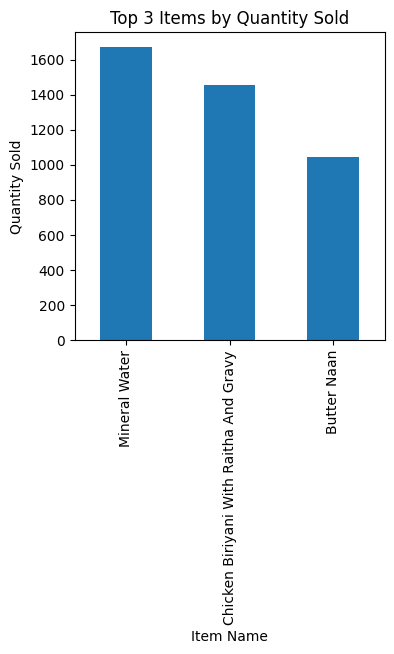

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
top_3.plot(kind='bar')
plt.title('Top 3 Items by Quantity Sold')
plt.xlabel('Item Name')
plt.ylabel('Quantity Sold')
plt.show()

In [ ]:
#top 3 sold item by revenue
top_3_revenue= data.groupby('Item Name')['Final Total'].sum().sort_values(ascending = False)[0:3]
print(top_3_revenue)

Item Name
Chicken Biriyani With Raitha And Gravy    240730.96
Chicken Fried Rice                        119347.20
Butter Naan                                65387.74
Name: Final Total, dtype: float64


In [ ]:
#highest sold invoice on 14 -9-2023
# filter data for the given date
date_data = data[data['Date'] == '14-09-2023']
hs = (
    date_data.groupby('Invoice No.')['Final Total'] .sum().sort_values(ascending=False)
)
print(hs)


Series([], Name: Final Total, dtype: float64)


In [ ]:
# Identify invoices whose bill value is above overall avg bill value
invoice_total=data.groupby('Invoice No.')['Final Total'].sum() > data.groupby('Invoice No.')['Final Total'].sum().mean()
print(invoice_total)


Invoice No.
23465     True
23466    False
23467     True
23468    False
23469    False
         ...  
28385     True
28386     True
28387     True
28388     True
28389     True
Name: Final Total, Length: 4925, dtype: bool


In [ ]:
data.groupby('Invoice No.')['Final Total'].sum()

,Final Total
Invoice No.,
23465,1134.00
23466,441.00
23467,774.88
23468,273.00
23469,462.00
...,...
28385,493.50
28386,1479.44
28387,1501.50


In [ ]:
#types of ml  - supervised unsupervised reinforcement
if a model is confused it  will go for decision based(condition)
entropy is the confusion level of a model entropy should be very low
decision tree works based on conditions

entropy
infromation gain
gini index

In [ ]:
library
data import
eda
data viz
DATA PREPROCESSING = NULL/MISSING VALUES ,OUTLIERS,ERRORS,STANDARDIZATION
X,Y
TRAIN TEST split
ALGORITHM
PERFORMANCE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
d = pd.read_csv("/content/diabetes (1).csv")

In [ ]:
d.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
x_train = d.drop(columns='Outcome',axis=1)
y_train = d['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
x = d[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y = d["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split(x_train,y_train,test_size=0.2,random_state=2)

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 602            1      124             74             36        0  27.8   
 429            1       95             82             25      180  35.0   
 623            0       94             70             27      115  43.5   
 209            7      184             84             33        0  35.5   
 589            0       73              0              0        0  21.1   
 ..           ...      ...            ...            ...      ...   ...   
 534            1       77             56             30       56  33.3   
 584            8      124             76             24      600  28.7   
 493            4      125             70             18      122  28.9   
 527            3      116             74             15      105  26.3   
 168            4      110             66              0        0  31.9   
 
      DiabetesPedigreeFunction  Age  
 602                     0.100   30  
 429                  

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
a = DecisionTreeClassifier(criterion="entropy",max_depth=3)
a.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

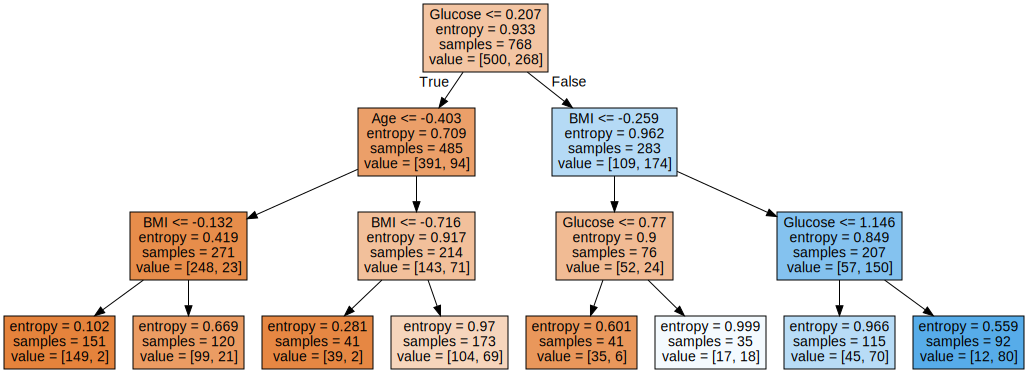

In [ ]:
graphviz.Source(export_graphviz(a,feature_names=x.columns,filled=True))

In [ ]:
when to use decision tree and when not to?
when ur data is non linear use decision tree it doesnt have any dependency,
if ur data is  very huge and  u have got n number of feautres dont go for decsion tree, because it will get confused and tree could not end.
if we wanted to give right justificcaation just use decision tree (should be rule based)
wherever you want fast classfication / interference explainable answer use decision tree.